# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [1]:
# Set the API base URL
url = "https://api.openweathermap.org"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"/data/2.5/weather?q={city}&APPID={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # print(json.dumps(city_weather, indent=4, sort_keys=True))
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


NameError: name 'cities' is not defined

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,287.44,79,92,2.10,AU,1680729730
1,saint-philippe,-21.3585,55.7679,296.92,82,30,2.96,RE,1680729731
2,georgetown,5.4112,100.3354,298.11,93,20,1.03,MY,1680729732
3,east london,-33.0153,27.9116,292.92,69,0,6.96,ZA,1680729432
4,barrow,71.2906,-156.7887,252.16,77,100,4.63,US,1680729733


In [7]:
# Export the City_Data into a csv
isExists = os.path.isdir("output_data")
if not isExists:
    os.mkdir("output_data")
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,287.44,79,92,2.10,AU,1680729730
1,saint-philippe,-21.3585,55.7679,296.92,82,30,2.96,RE,1680729731
2,georgetown,5.4112,100.3354,298.11,93,20,1.03,MY,1680729732
3,east london,-33.0153,27.9116,292.92,69,0,6.96,ZA,1680729432
4,barrow,71.2906,-156.7887,252.16,77,100,4.63,US,1680729733


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

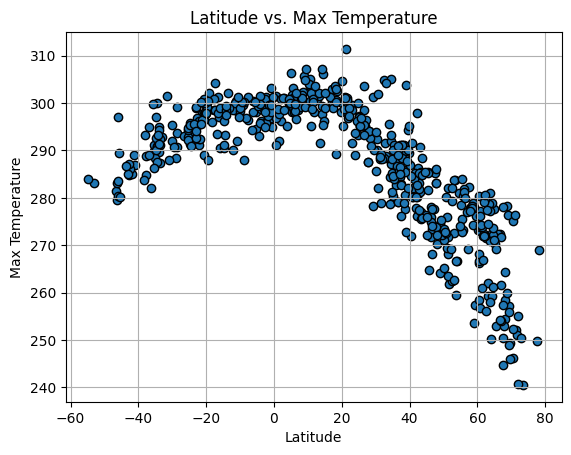

In [9]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(latitude, temp, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

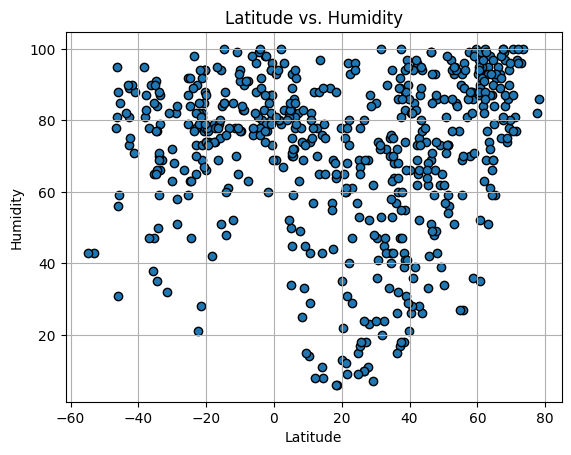

In [10]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity'].astype("float")
plt.scatter(latitude, humidity, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

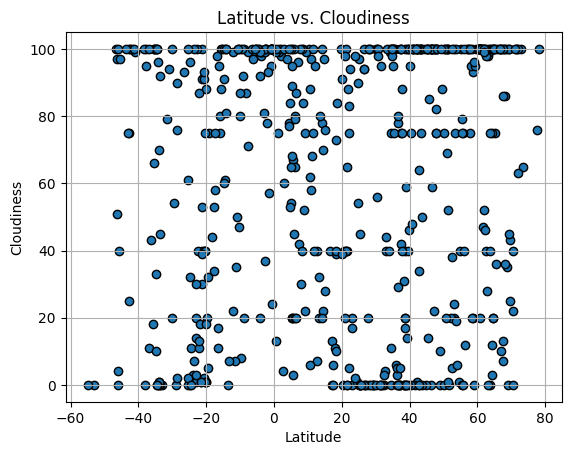

In [11]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

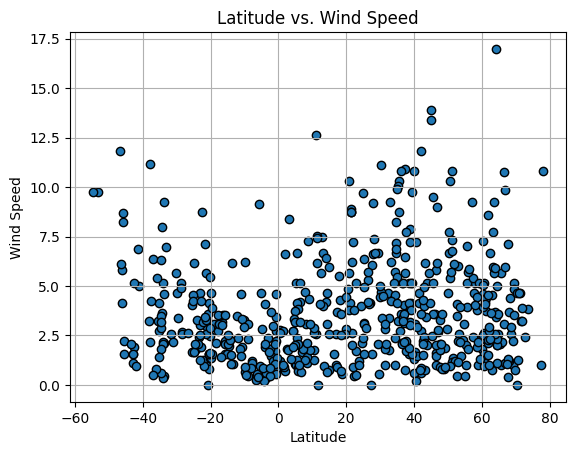

In [12]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, wind_speed, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def linreg(x_axis, y_axis, xlabel, ylabel, title, xpos, ypos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    print("The r-value is " + str(rvalue) + ".")
    regress_values = slope * x_axis + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, "r-")
    plt.annotate(line_eq,(xpos, ypos),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    return str(rvalue)

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,georgetown,5.4112,100.3354,298.11,93,20,1.03,MY,1680729732
4,barrow,71.2906,-156.7887,252.16,77,100,4.63,US,1680729733
5,kapaa,22.0752,-159.3190,299.33,80,75,7.20,US,1680729733
7,tuktoyaktuk,69.4541,-133.0374,257.15,78,100,5.14,CA,1680729734
8,tiksi,71.6872,128.8694,250.96,97,100,3.25,RU,1680729735


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,287.44,79,92,2.10,AU,1680729730
1,saint-philippe,-21.3585,55.7679,296.92,82,30,2.96,RE,1680729731
3,east london,-33.0153,27.9116,292.92,69,0,6.96,ZA,1680729432
6,mar del plata,-38.0023,-57.5575,293.16,81,0,11.18,AR,1680729734
10,mataura,-46.1927,168.8643,279.48,95,97,4.14,NZ,1680729736


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8719627903518569.


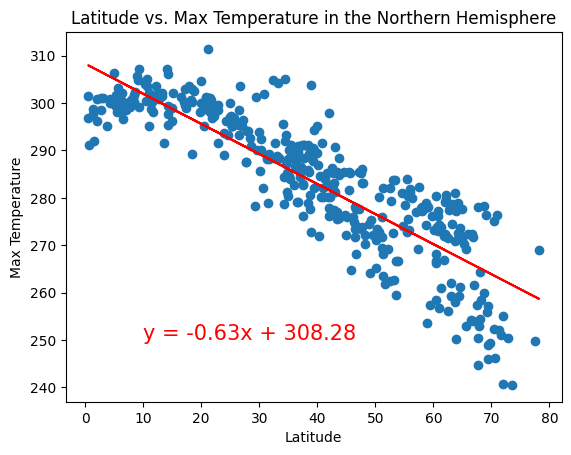

In [46]:
# Linear regression on Northern Hemisphere
northern_hemi_lat = northern_hemi_df['Lat']
rval1 = linreg(northern_hemi_lat, northern_hemi_df['Max Temp'], "Latitude", "Max Temperature", "Latitude vs. Max Temperature in the Northern Hemisphere", 10, 250)

The r-value is 0.7226038677765819.


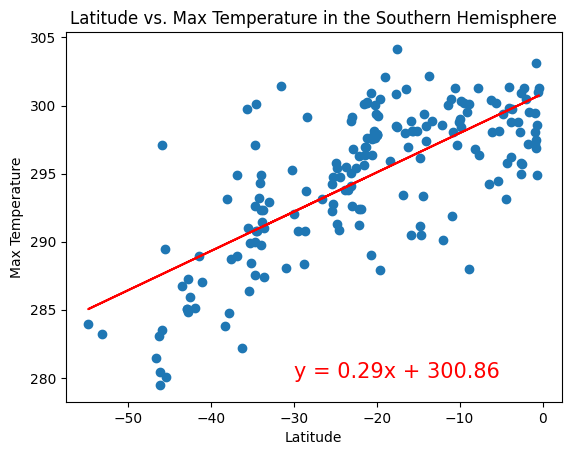

In [47]:
# Linear regression on Southern Hemisphere
southern_hemi_lat = southern_hemi_df['Lat']
rval2 = linreg(southern_hemi_lat, southern_hemi_df['Max Temp'], "Latitude", "Max Temperature", "Latitude vs. Max Temperature in the Southern Hemisphere", -30, 280)

In [1]:
from IPython.display import Markdown as md
md("**Discussion about the linear relationship:** In the northern hemisphere there is a strong negative correlation between latitude and temperature, with an r-value of {}. In the southern hemisphere there is a moderate correlation between latitude and temperature, with an r-value of only {}. Although, when we plot both hemispheres on the same graph, it is clear that a parabolic regression that reaches its apex at the equator would fit the data better than linear regressions do.".format(rval1, rval2))

NameError: name 'rval1' is not defined

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3056310867666496.


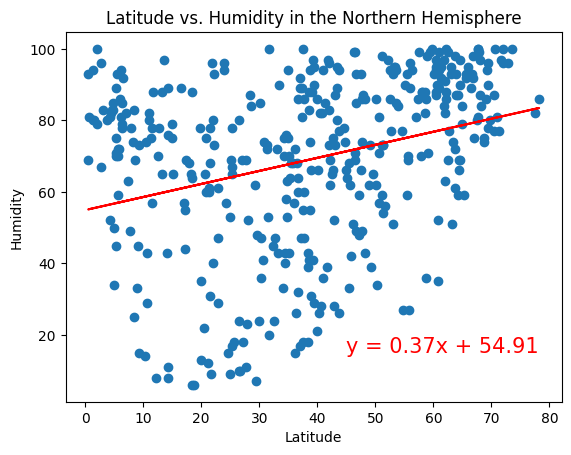

In [48]:
# Northern Hemisphere
rval3 = linreg(northern_hemi_lat, northern_hemi_df['Humidity'], "Latitude", "Humidity", "Latitude vs. Humidity in the Northern Hemisphere", 45, 15)

The r-value is 0.28706846518373946.


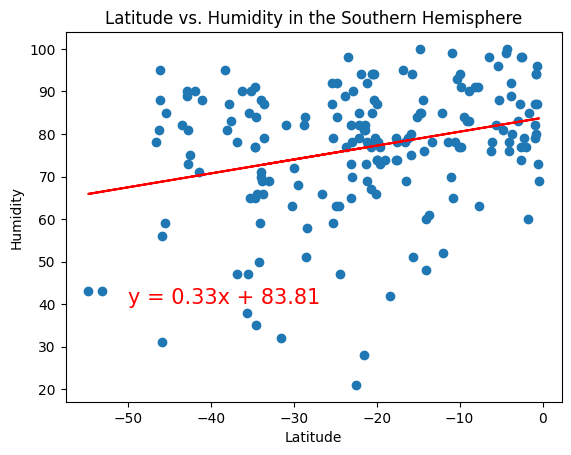

In [49]:
# Southern Hemisphere
rval4 = linreg(southern_hemi_lat, southern_hemi_df['Humidity'], "Latitude", "Humidity", "Latitude vs. Humidity in the Southern Hemisphere", -50, 40)

In [36]:
md("**Discussion about the linear relationship:** In the northern hemisphere there is a very weak correlation between latitude and humidity, with an r-value of {}. In the southern hemisphere there is also a very weak correlation between latitude and Humidity, with an r-value of only {}. Overall, linear regressions do not seem to fit this data very well, and there is little correlation between latitude and humidity.".format(rval3, rval4))

**Discussion about the linear relationship:** In the northern hemisphere there is a very weak correlation between latitude and humidity, with an r-value of 0.3056310867666496. In the southern hemisphere there is also a very weak correlation between latitude and Humidity, with an r-value of only 0.28706846518373946. Overall, linear regressions do not seem to fit this data very well, and there is little correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.11900856516037865.


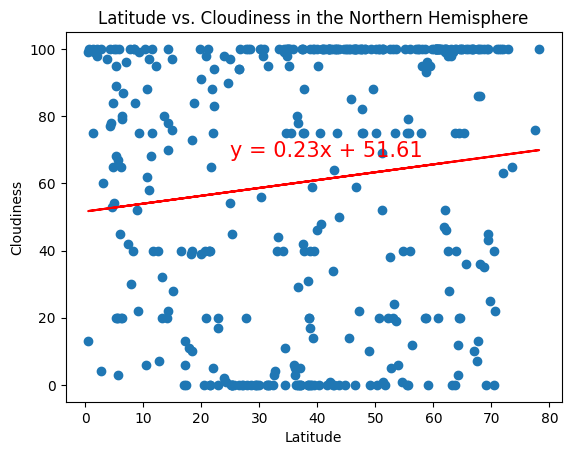

In [51]:
# Northern Hemisphere
rval5 = linreg(northern_hemi_lat, northern_hemi_df['Cloudiness'], "Latitude", "Cloudiness", "Latitude vs. Cloudiness in the Northern Hemisphere", 25, 68)

The r-value is 0.25275710025393894.


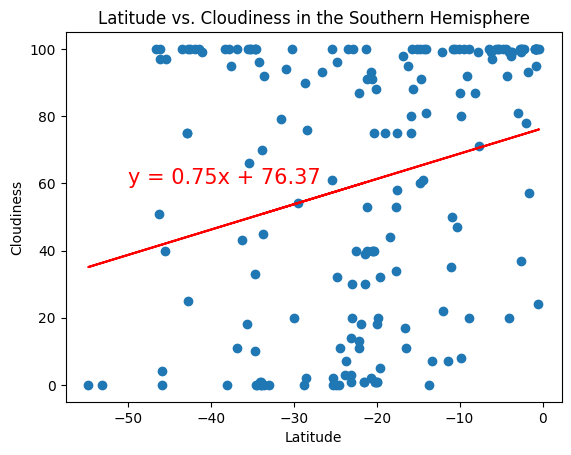

In [52]:
# Southern Hemisphere
rval6 = linreg(southern_hemi_lat, southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness", "Latitude vs. Cloudiness in the Southern Hemisphere", -50, 60)

In [24]:
md("**Discussion about the linear relationship:** In the northern hemisphere there is almost no correlation between latitude and cloudiness, with an r-value of {}. In the southern hemisphere, there is a mild correlation between latitude and cloudiness, with an r-value of {}. Overall, linear regressions do not seem to fit this data very well, and there is hardly any correlation between latitude and cloudiness.".format(rval5, rval6))

**Discussion about the linear relationship:** In the northern hemisphere there is almost no correlation between latitude and cloudiness, with an r-value of 0.11900856516037865. In the southern hemisphere, there is a mild correlation between latitude and cloudiness, with an r-value of 0.25275710025393894. Overall, linear regressions do not seem to fit this data very well, and there is hardly any correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.04798452846259948.


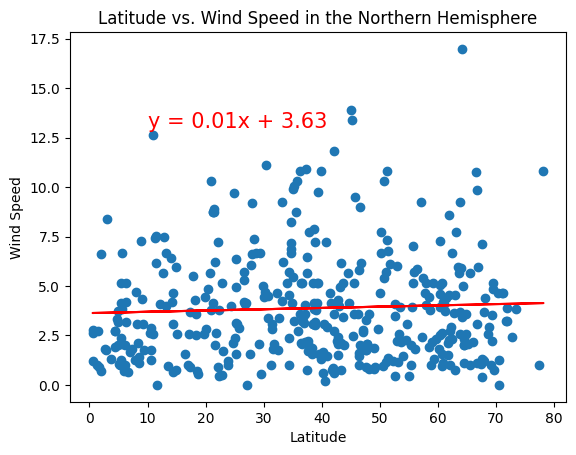

In [54]:
# Northern Hemisphere
rval7 = linreg(northern_hemi_lat, northern_hemi_df['Wind Speed'], "Latitude", "Wind Speed", "Latitude vs. Wind Speed in the Northern Hemisphere", 10, 13)

The r-value is -0.42837449577001857.


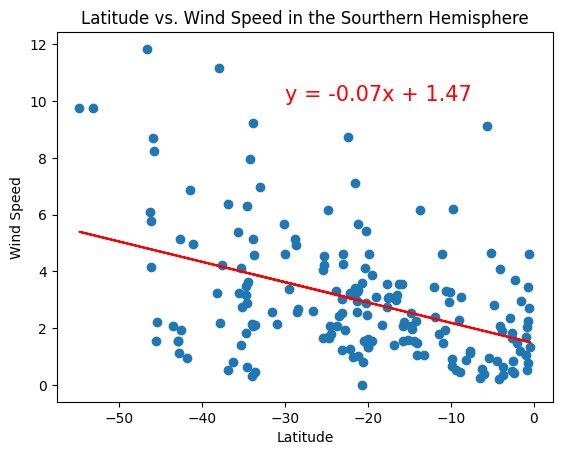

In [56]:
# Southern Hemisphere
rval8 = linreg(southern_hemi_lat, southern_hemi_df['Wind Speed'], "Latitude", "Wind Speed", "Latitude vs. Wind Speed in the Sourthern Hemisphere", -30, 10)

In [27]:
md("**Discussion about the linear relationship:** In the northern hemisphere, there is almost no correlation between latitude and wind speed, with an r-value of {}. In the southern hemisphere there is a just slight negative correlation between latitude and wind speed, with an r-value of {}.".format(rval7, rval8))

**Discussion about the linear relationship:** In the northern hemisphere, there is almost no correlation between latitude and wind speed, with an r-value of 0.04798452846259948. In the southern hemisphere there is a just slight negative correlation between latitude and wind speed, with an r-value of -0.42837449577001857.